In [1]:
from functools import partial

from ipynb.fs.full.quantumsystem import System, HyperSystem, qs
from ipynb.fs.full.DamageSystem import Armor
from ipynb.fs.full.MovementSystem import Elevation, XYLocation, Move
from ipynb.fs.full.FactionSystem import Faction

In [2]:
class StructureType(System):
    """ High level type of structure """

@StructureType.sd
@Faction.sd
@Armor.sd
@Elevation.sd
@XYLocation.sd
class Structure(HyperSystem):
    @classmethod
    def get_by_structure_type(cls, structureType):
        return [r[0] for r in qs.get(edge_name=[StructureType], terminant=structureType)]
    
    @classmethod
    def buildStructureFactory(cls, **systemDefaults):
        def newStructureFactory(structureName, faction="Unaligned", elevation=5, xylocation=None):
            systemDefaults["Faction"] = faction
            systemDefaults["Elevation"] = elevation
            systemDefaults["XYLocation"] = xylocation or [0, 0]
            return cls(structureName, **systemDefaults)
        return newStructureFactory

In [3]:
StructureFactories = {
    "Factory": Structure.buildStructureFactory(
        StructureType="Landscape",
        XYLocation=[0, 0],
        Elevation=5,
        Armor={
            "ArmorPlating": "9",
            "ArmorPlatingDamage": 0,
            "ArmorStructural": "7",
            "ArmorStructuralDamage": 0
        },
        Faction="Unaligned"
    ),
    "Apartment Tower": Structure.buildStructureFactory(
        StructureType="Apartment Tower",
        XYLocation=[0, 0],
        Elevation=10,
        Armor={
            "ArmorPlating": "9",
            "ArmorPlatingDamage": 0,
            "ArmorStructural": "7",
            "ArmorStructuralDamage": 0
        },
        Faction="Unaligned"
    )
}

In [4]:
@Elevation.sd
@XYLocation.sd
class Terrain(HyperSystem):
    @classmethod
    def buildTerrainFactory(cls, **systemDefaults):
        return partial(
            cls,
            **systemDefaults)
    
    @classmethod
    def buildTerrainFactory(cls, **systemDefaults):
        def newTerrainFactory(terrainName, elevation=5, xylocation=None):
            systemDefaults["Elevation"] = elevation
            systemDefaults["XYLocation"] = xylocation or [0, 0]
            return cls(terrainName, **systemDefaults)
        return newTerrainFactory


TerrainFactories = {
    "UniformElevation": Terrain.buildTerrainFactory(
        Elevation=10,
        XYLocation=[0, 0]
    )
}

Received expected exception: Failed to retrieve MovementSpeed relationship on ApartmentB


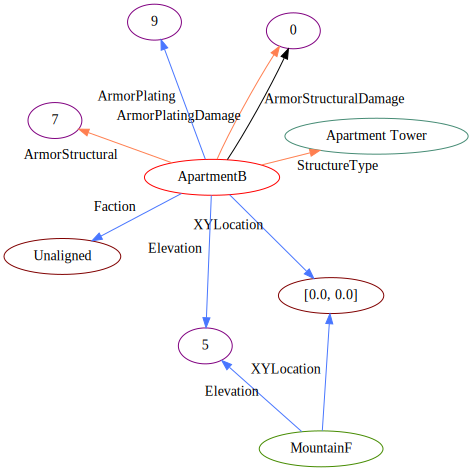

In [5]:
if __name__ == "__main__":
    from IPython.display import display
    qs.reset()

    StructureFactories['Apartment Tower']('ApartmentB')
    assert Structure.get_by_structure_type("Apartment Tower") == ['ApartmentB']
    try:
        Move.move(entity="ApartmentB", delta=[1, 0, 0])
    except Move.Movement.MovementSpeed.RelationshipDoesNotExist as rdne:
        print(f"Received expected exception: {rdne}")
    TerrainFactories['UniformElevation']('MountainF')
    display(qs.render())